In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib.gridspec as gridspec

from utils import *

DATA_PATH = "./data/"

%load_ext autoreload
%autoreload 2
# %matplotlib Qt

# Task 4

In [2]:
X = np.loadtxt(DATA_PATH + "takens_1.txt")

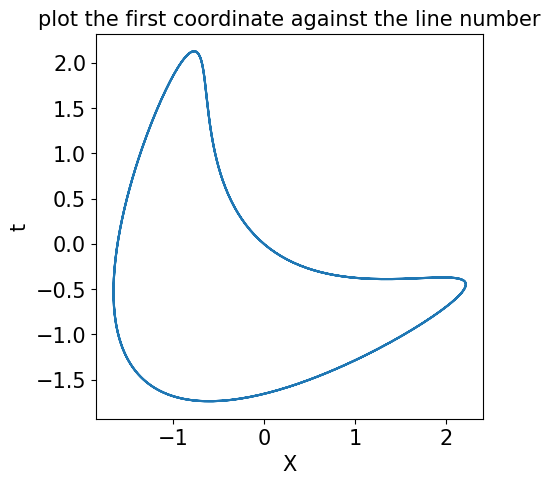

In [3]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()

ax.tick_params(labelsize=15)
ax.set_xlabel("X", fontdict={'weight':'normal','size': 15})
ax.set_ylabel("t", fontdict={'weight':'normal','size': 15})
ax.set_title("plot the first coordinate against the line number", fontdict={'weight':'normal','size': 15})
# ax.scatter(X[:,0], X[:,1], s=1)
ax.plot(X[:,0], X[:,1])

## part 1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


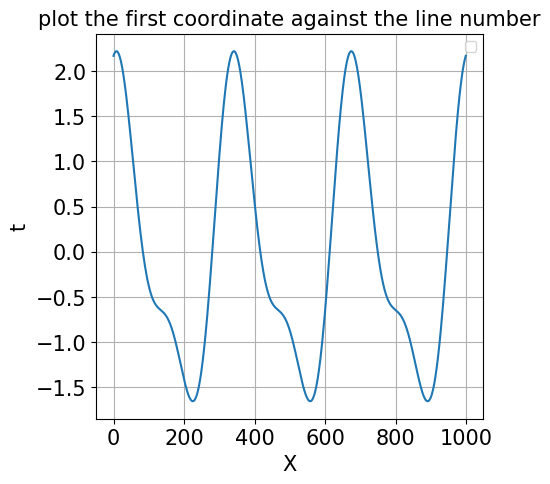

In [4]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()

ax.tick_params(labelsize=15)
ax.set_xlabel("X", fontdict={'weight':'normal','size': 15})
ax.set_ylabel("t", fontdict={'weight':'normal','size': 15})
ax.set_title("plot the first coordinate against the line number", fontdict={'weight':'normal','size': 15})
# ax.scatter(X[:,0], X[:,1], s=1)
ax.plot(X[:,0])
ax.grid()
ax.legend()

Text(0.5, 0, '$x(t- 2\\Delta t)$')

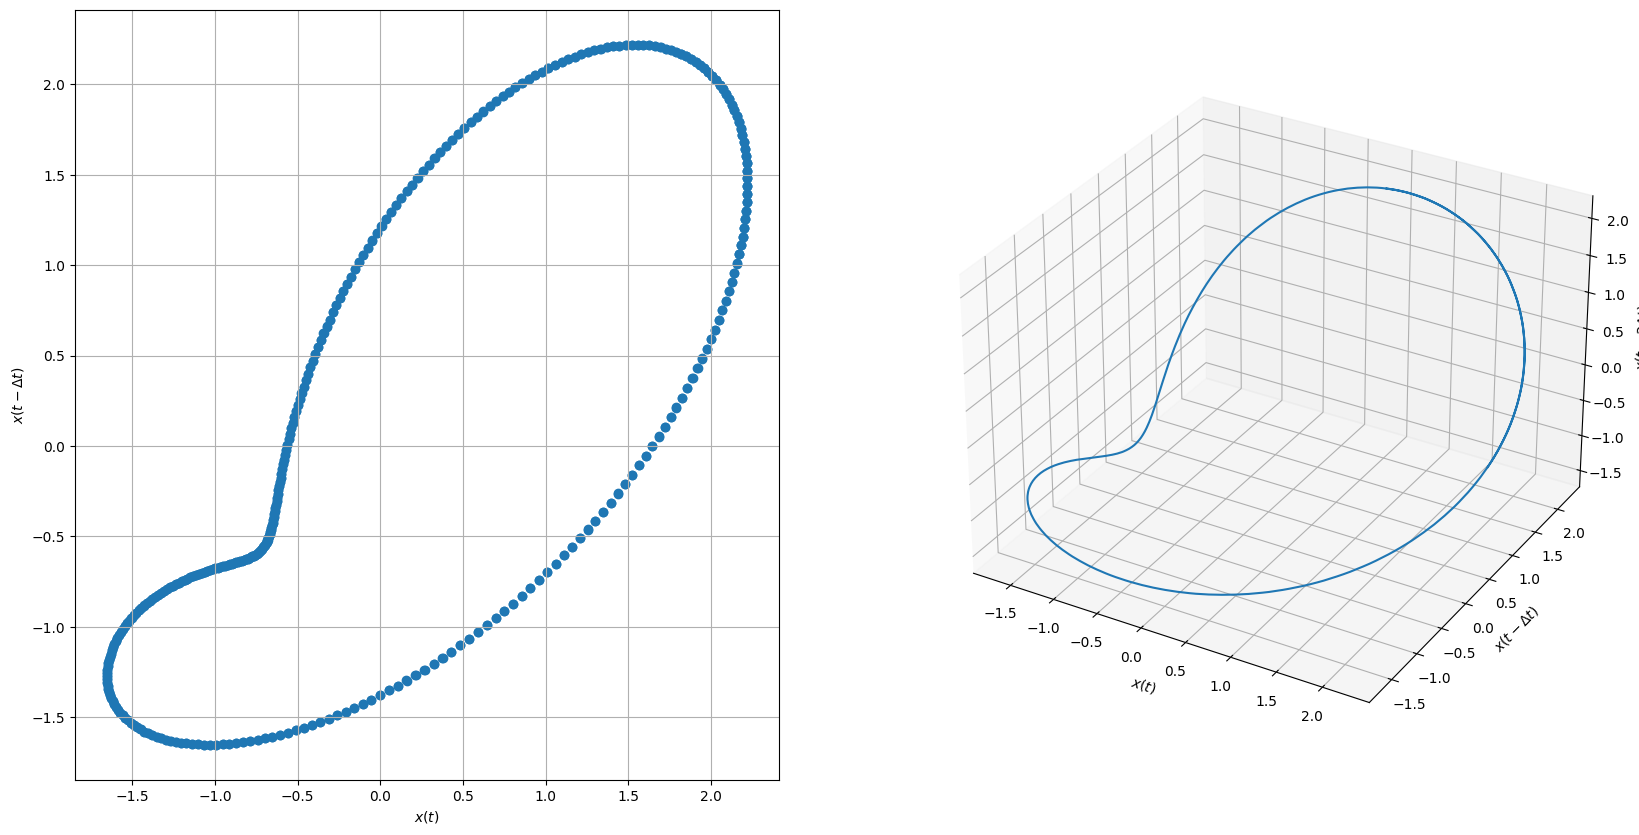

In [5]:
delta_t = 300

fig = plt.figure(figsize=(20, 10))

ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2, projection='3d')
ax0.scatter(X[:X.shape[0]-delta_t, 0], X[delta_t:, 0])
ax0.set_xlabel("$x(t)$")
ax0.set_ylabel("$x(t- \Delta t)$")
ax0.grid()

ax1.plot(X[:X.shape[0]-2*delta_t, 0], X[delta_t:X.shape[0]-delta_t, 0], X[2*delta_t:, 0])
ax1.set_xlabel("$x(t)$")
ax1.set_ylabel("$x(t- \Delta t)$")
ax1.set_zlabel("$x(t- 2\Delta t)$")

## part 2

In [6]:
def lorenz(t, X, sigma, beta, rho):
    """
    define the Lorenz equations
    :param X: the initial condition
    :param sigma, beta, rho: Lorenz paramters
    """
    x, y, z = X

    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z

    dX_dt = [dx_dt, dy_dt, dz_dt]

    return dX_dt

In [7]:
def lorenz_trajectory(X, sigma, beta, rho, start_time, end_time):
    """
    integrate $x,y,z$ with respect to $t$ by \emph{solve_ivp} and plot the trajectory.
    :param X: the initial condition
    :param sigma, beta, rho: Lorenz paramters
    :param linewidth: the width of line in plot
    """
    t = np.linspace(start_time, end_time, 10000)

    # integrate the Lorenz equations
    # xyz = odeint(lorenz, X, t, args = (sigma, beta, rho))
    xyz = solve_ivp(lorenz, t_span = [t[0], t[-1]], y0 = X, t_eval = t, args = (sigma, beta, rho))
    xyz = xyz["y"]

    # plot the trajectory in three-dimensional phase space
    fig = plt.figure(figsize=(10, 10))
    ax1 = fig.add_subplot(projection='3d')
    ax1.plot(xyz[0, :], xyz[1, :], xyz[2, :], label="trajectory")
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")
    ax1.set_zlabel("z")
    ax1.legend()
    ax1.set_title(f"$sigma={sigma}, beta={round(beta,2)}, rho={rho}, X_0=[{X[0]}, {X[1]}, {X[2]}]$")

    return xyz

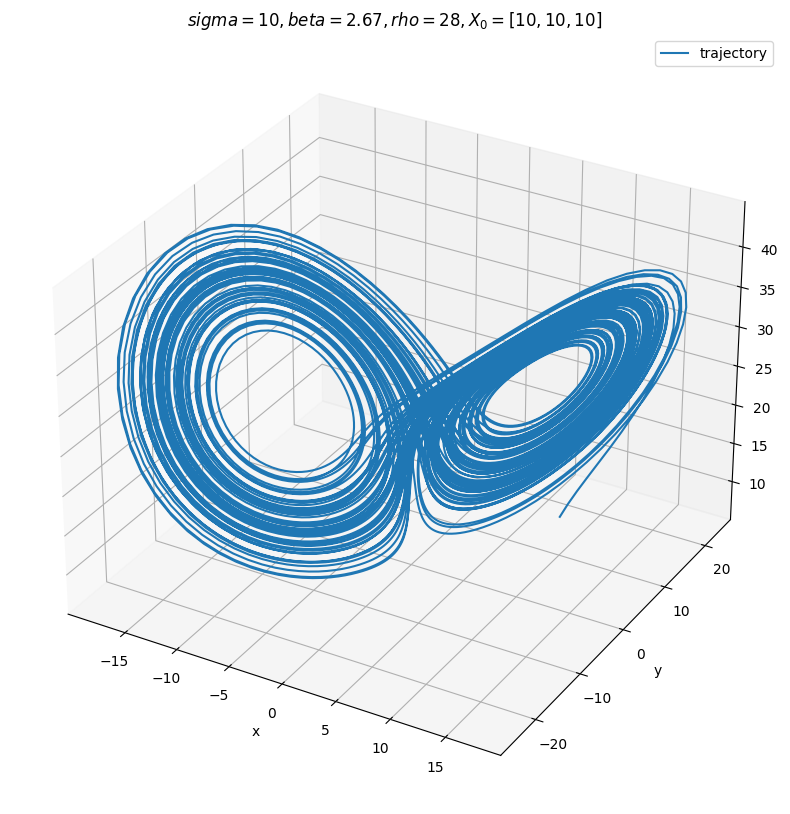

In [8]:
rho = 28
sigma = 10
beta = 8/3
x0 = np.array([10, 10, 10])

start_time = 0
end_time = 100
X = lorenz_trajectory(x0, sigma, beta, rho, start_time, end_time)
X = X.T

Text(0.5, 0, '$x(t- 2\\Delta t)$')

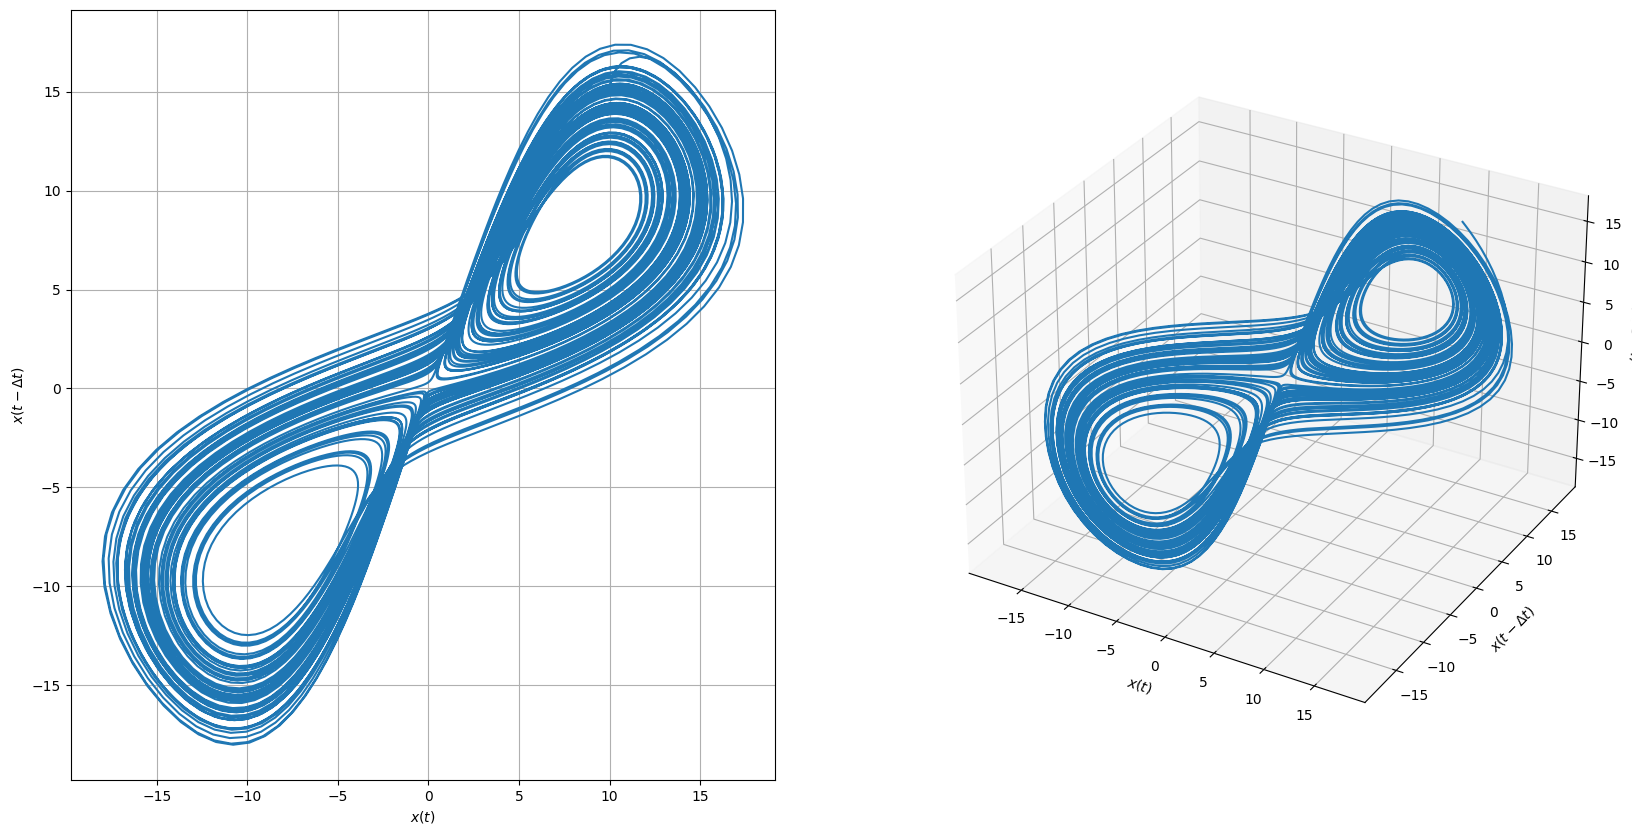

In [9]:
delta_t = 10

fig = plt.figure(figsize=(20, 10))

ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2, projection='3d')
ax0.plot(X[:X.shape[0]-delta_t, 0], X[delta_t:, 0])
ax0.set_xlabel("$x(t)$")
ax0.set_ylabel("$x(t- \Delta t)$")
ax0.grid()

ax1.plot(X[:X.shape[0]-2*delta_t, 0], X[delta_t:X.shape[0]-delta_t, 0], X[2*delta_t:, 0])
ax1.set_xlabel("$x(t)$")
ax1.set_ylabel("$x(t- \Delta t)$")
ax1.set_zlabel("$x(t- 2\Delta t)$")

Text(0.5, 0, '$z(t- 2\\Delta t)$')

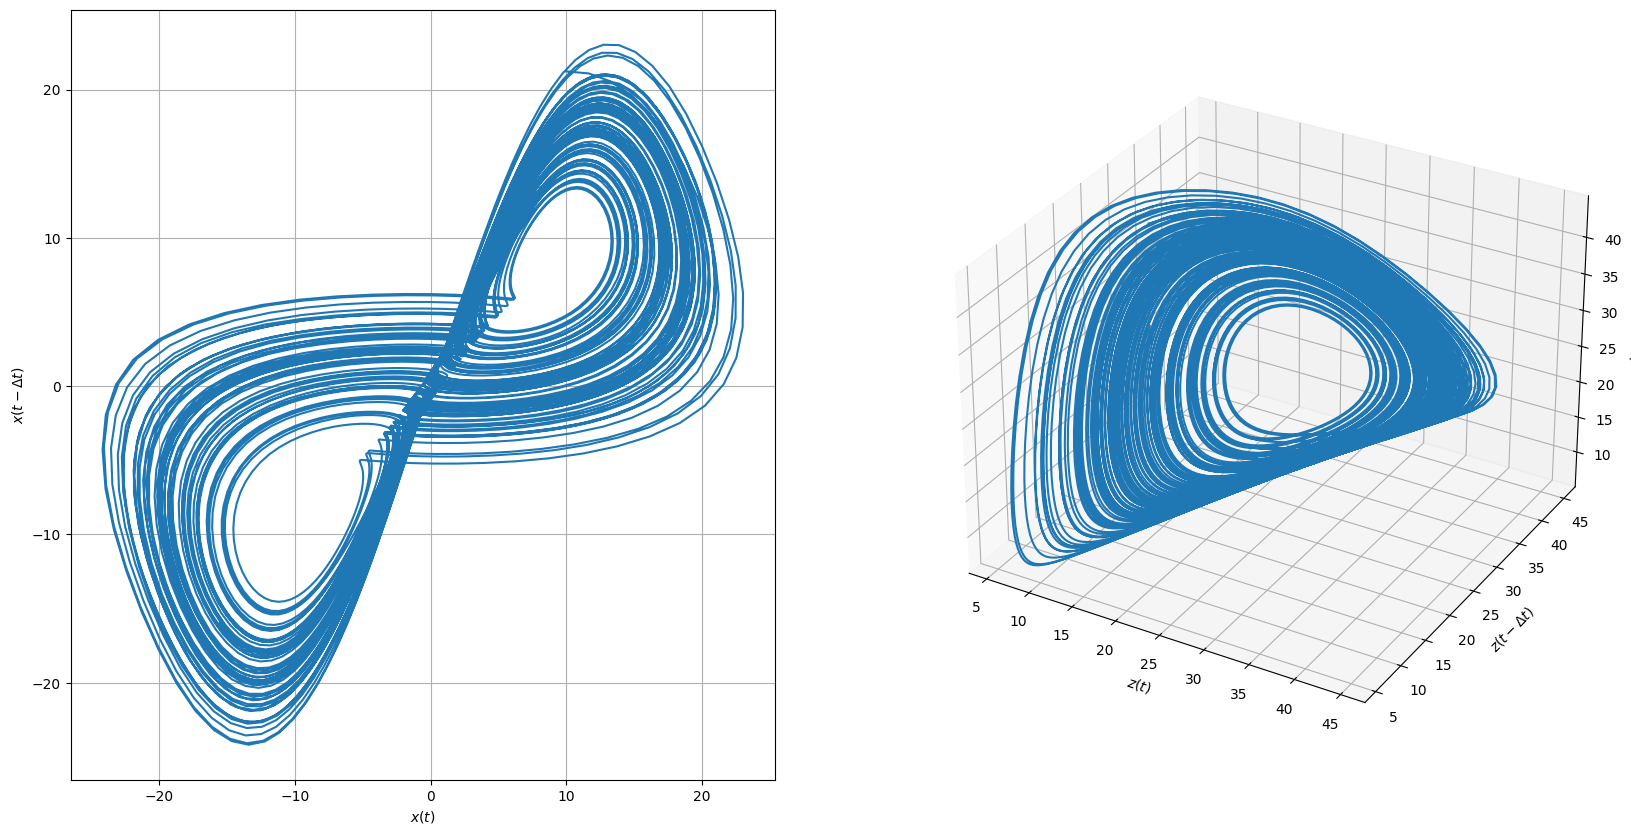

In [10]:
fig = plt.figure(figsize=(20, 10))

ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2, projection='3d')
ax0.plot(X[:X.shape[0]-delta_t, 1], X[delta_t:, 1])
ax0.set_xlabel("$x(t)$")
ax0.set_ylabel("$x(t- \Delta t)$")
ax0.grid()

ax1.plot(X[:X.shape[0]-2*delta_t, 2], X[delta_t:X.shape[0]-delta_t, 2], X[2*delta_t:, 2])
ax1.set_xlabel("$z(t)$")
ax1.set_ylabel("$z(t- \Delta t)$")
ax1.set_zlabel("$z(t- 2\Delta t)$")

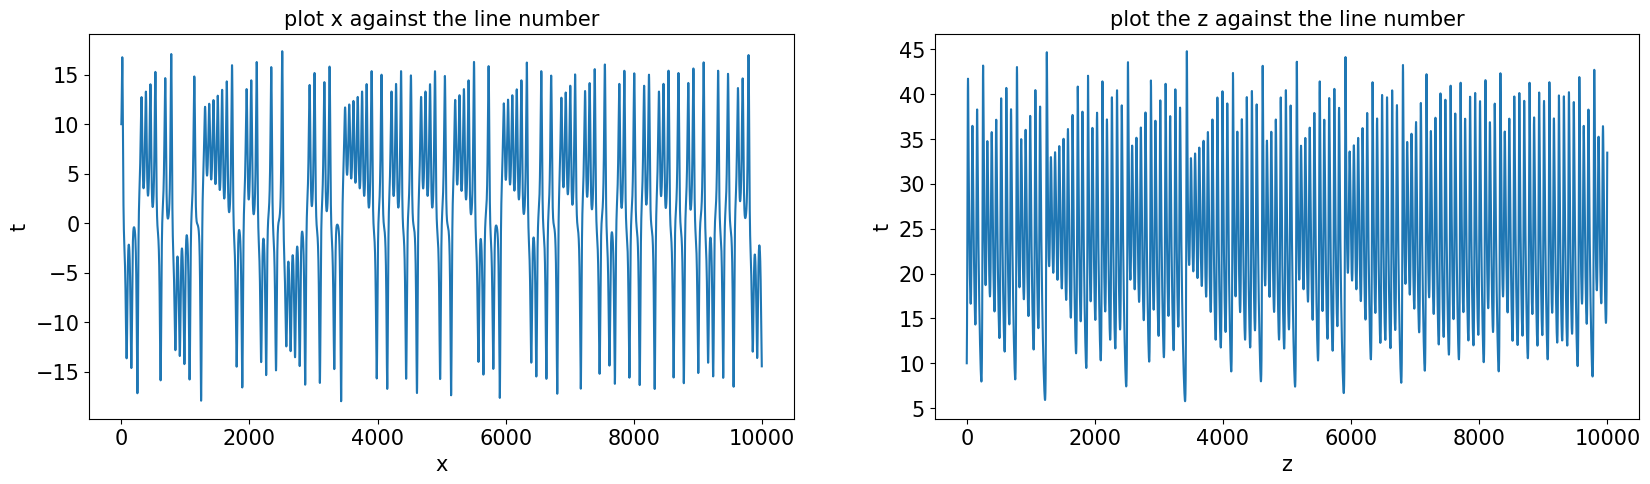

In [11]:
fig = plt.figure(figsize=(20,5))
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)


ax0.tick_params(labelsize=15)
ax0.set_xlabel("x", fontdict={'weight':'normal','size': 15})
ax0.set_ylabel("t", fontdict={'weight':'normal','size': 15})
ax0.set_title("plot x against the line number", fontdict={'weight':'normal','size': 15})
# ax.scatter(X[:,0], X[:,1], s=1)
ax0.plot(X[:,0])

ax1.tick_params(labelsize=15)
ax1.set_xlabel("z", fontdict={'weight':'normal','size': 15})
ax1.set_ylabel("t", fontdict={'weight':'normal','size': 15})
ax1.set_title("plot the z against the line number", fontdict={'weight':'normal','size': 15})
# ax.scatter(X[:,0], X[:,1], s=1)
ax1.plot(X[:,2])

## bonus

In [12]:
x1 = X[:X.shape[0]-2*delta_t, 0]
x2 = X[delta_t:X.shape[0]-delta_t, 0]
x3 = X[2*delta_t:, 0]

x_0 = np.array([x1[:-1], x2[:-1], x3[:-1]])
x_1 = np.array([x1[1:], x2[1:], x3[1:]])
v = (x_1 - x_0) / 0.01

In [25]:
EPSILON = 6.2
L = 10j
GRID_b = np.mgrid[x_0.min():x_0.max():L, x_0.min():x_0.max():L, x_0.min():x_0.max():L]
GRID_b = GRID_b.reshape((3,GRID_b[0].size)).T
GRID_b[:, [1, 0]] = GRID_b[:, [0, 1]]
R_COND = 1e-5

In [31]:
coefficients = radial_basis_lst_sqr_approx(x_0.T, v.T, GRID_b, EPSILON, R_COND)

In [33]:
solver = SolverRadialBasis(x_0.T, start_time, end_time, coefficients, GRID_b, EPSILON)
x1_pre = solver.solve_linear_system()